In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import vtk

In [26]:
yhalf = 0.04/2
xcrack = 0.04
ycrack = 0.04
n = 16

In [5]:
xarea = np.array([0,0.1,0.1,0,0])
yarea = np.array([0,0,0.1,0.1,0])

In [6]:
xareaPD = np.array([0.04,0.1,0.1,0.04,0.04])
yareaPD = np.array([0.03,0.03,0.07,0.07,0.03])

In [27]:
hy = yhalf/n
h = (yhalf-hy/2) / n
h 

0.0012109375

In [28]:
delta = 4 * h
delta

0.00484375

In [9]:
x = []
y = []
volume = []
for j in range(0,int(ycrack/h)+1):
    for i in range(0,int(0.06/h)):
        x.append(0.04+i*h)
        y.append(0.03+j*h)
        if i == 0 or i == int(0.06/h)-1 or j == 0 or j == int(ycrack/h) :
            volume.append(h*h/2)
        else:
            volume.append(h*h)
        
    

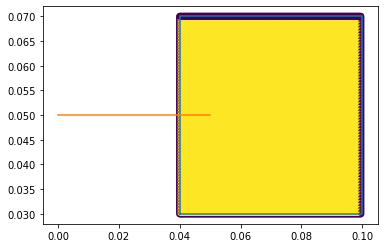

In [10]:
plt.plot(xareaPD,yareaPD)
plt.plot([0.,0.05],[0.05,0.05])
plt.scatter(x,y,c=volume)

In [11]:
min(x)

0.04

In [12]:
min(y)

0.03

In [13]:
max(x)

0.09953125

In [14]:
max(y)

0.06999755859375001

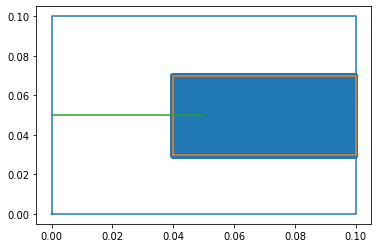

In [15]:
plt.plot(xarea,yarea)
plt.plot(xareaPD,yareaPD)
plt.plot([0.0,0.05],[0.05,0.05])
plt.scatter(x,y)

In [16]:
writer = vtk.vtkXMLUnstructuredGridWriter()
writer.SetFileName("coupling_"+str(n)+".vtu")
grid = vtk.vtkUnstructuredGrid()
points = vtk.vtkPoints()
points.SetNumberOfPoints(len(x))
points.SetDataTypeToDouble()

for i in range(0,len(x)):
    points.InsertPoint(i,x[i],y[i],0.)
    
grid.SetPoints(points)


dataOut = grid.GetPointData()
array = vtk.vtkDoubleArray()
array.SetName("Volumes")
array.SetNumberOfComponents(1)
array.SetNumberOfTuples(len(x))

for i in range(0,len(x)):
    array.SetTuple1(i,volume[i])
dataOut.AddArray(array)


writer.SetInputData(grid)
writer.GetCompressor().SetCompressionLevel(0)
writer.SetDataModeToAscii()
writer.Write()

1

In [17]:
%%bash 
ls

construct-aligned-mesh.ipynb
coupling_16.vtk
coupling_16.vtu
coupling_32.vtk
coupling_32.vtu
coupling_64.vtu


In [18]:
import meshio

In [19]:
points = []
cells = []
for i in range(0,len(x)):
    points.append([x[i],y[i],0])
    cells.append(("vertex", [[i]]))

In [20]:
mesh = meshio.Mesh(
    points,
    cells,
    # Optionally provide extra data on points, cells, etc.
    point_data={"Volume": volume},
    # Each item in cell data must match the cells array
)
mesh.write(
    "coupling_"+str(n)+".vtk",  # str, os.PathLike, or buffer/open file
    # file_format="vtk",  # optional if first argument is a path; inferred from extension
)

In [21]:
%%bash 
ls

construct-aligned-mesh.ipynb
coupling_16.vtk
coupling_16.vtu
coupling_32.vtk
coupling_32.vtu
coupling_64.vtk
coupling_64.vtu


In [22]:
mesh = meshio.read(
    "coupling_"+str(n)+".vtk",  # string, os.PathLike, or a buffer/open file
    # file_format="stl",  # optional if filename is a path; inferred from extension
    # see meshio-convert -h for all possible formats
)